In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Parth Suthar\Desktop\CT604E-N Machine Learning\Datasets\spam.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [7]:
df.columns

Index(['v1', 'v2'], dtype='object')

<AxesSubplot:xlabel='v1', ylabel='count'>

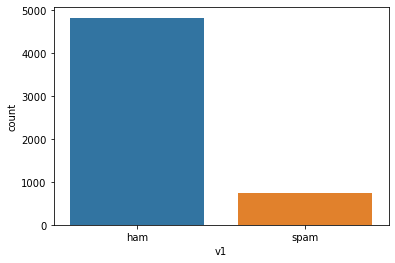

In [8]:
#plt.figure(figsize=(6,6))
sns.countplot(x= "v1",data= df)

In [9]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Parth
[nltk_data]     Suthar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [12]:
def Model(model, X, y):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
 
    pipeline_model = Pipeline([('vect', TfidfVectorizer(lowercase=True, stop_words = 'english')),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    


    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report is:\n",classification_report(y_test, y_pred))
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    print("Training Score:\n",pipeline_model.score(x_train,y_train)*100)
    

In [13]:
x = df['v2']
y = df['v1']

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
Model(model, x, y)

Confusion Matrix:
 [[1220    0]
 [  58  115]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1220
        spam       1.00      0.66      0.80       173

    accuracy                           0.96      1393
   macro avg       0.98      0.83      0.89      1393
weighted avg       0.96      0.96      0.95      1393

Accuracy: 95.83632447954056
Training Score:
 96.96099545345777


In [15]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
Model(model, x, y)

Confusion Matrix:
 [[1220    0]
 [  45  128]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1220
        spam       1.00      0.74      0.85       173

    accuracy                           0.97      1393
   macro avg       0.98      0.87      0.92      1393
weighted avg       0.97      0.97      0.97      1393

Accuracy: 96.76956209619526
Training Score:
 98.80354151710937


In [16]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
Model(model,x,y)

Confusion Matrix:
 [[1220    0]
 [ 138   35]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.90      1.00      0.95      1220
        spam       1.00      0.20      0.34       173

    accuracy                           0.90      1393
   macro avg       0.95      0.60      0.64      1393
weighted avg       0.91      0.90      0.87      1393

Accuracy: 90.09332376166547
Training Score:
 90.42833213687484


In [17]:
from sklearn.svm import SVC
model = SVC(probability=True )
Model(model, x, y)

Confusion Matrix:
 [[1219    1]
 [  33  140]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1220
        spam       0.99      0.81      0.89       173

    accuracy                           0.98      1393
   macro avg       0.98      0.90      0.94      1393
weighted avg       0.98      0.98      0.97      1393

Accuracy: 97.5592246949031
Training Score:
 99.78463747307968


In [18]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
Model(model,x,y)

Confusion Matrix:
 [[1213    7]
 [  78   95]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.94      0.99      0.97      1220
        spam       0.93      0.55      0.69       173

    accuracy                           0.94      1393
   macro avg       0.94      0.77      0.83      1393
weighted avg       0.94      0.94      0.93      1393

Accuracy: 93.89806173725772
Training Score:
 94.40057430007178


In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
Model(model, x, y)

Confusion Matrix:
 [[1218    2]
 [  32  141]]
Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1220
        spam       0.99      0.82      0.89       173

    accuracy                           0.98      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.98      0.98      0.97      1393

Accuracy: 97.5592246949031
Training Score:
 100.0
